In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from dowker_homology import dowker_persistent_homology, plot_persistence
%matplotlib notebook

In [2]:
# read data
mat = loadmat("data/pointsCycloOctane.mat")
coords = mat["pointsCycloOctane"]
print(coords.shape)

(6040, 24)


In [3]:
# choose parameters
n = 2000
interleaving = 6
dimension = 2

In [4]:
%%time 
homology_dowker, cover_radius_dowker, max_filtration_value_dowker = dowker_persistent_homology(
    coords, 
    n_samples=n, 
    interleaving=interleaving,
    dimension=dimension, 
    method="dowker",
    verbose=True)

Unreduced nerve has cardinality 666001834500.0
Clique reduced nerve of cover has cardinality 18068342
Sparse nerve of cover has cardinality 762928
CPU times: user 5h 45min 57s, sys: 21.4 s, total: 5h 46min 18s
Wall time: 5h 46min 16s


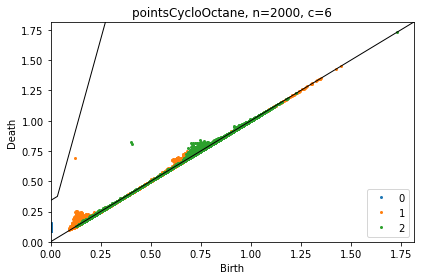

In [5]:
plot_dowker = plot_persistence(homology_dowker,
                               ticks=None, 
                               interleaving=interleaving,
                               cover_radius=cover_radius_dowker,
                               max_filtration_value=max_filtration_value_dowker,
                               title='pointsCycloOctane, n=2000, c=6',
                               s=10)

In [6]:
persistence = homology_dowker[:, 2] - homology_dowker[:, 1]
sorted_homology = homology_dowker[np.argsort(persistence)][::-1]

In [7]:
sorted_homology[:5]

array([[ 1.        ,  0.1237959 ,  0.69374092],
       [ 2.        ,  0.39998394,  0.82197121],
       [ 2.        ,  0.40829828,  0.81076392],
       [ 0.        ,  0.        ,  0.15568396],
       [ 0.        ,  0.        ,  0.15360745]])